In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Decision Tree

In [3]:
iris = datasets.load_iris()
Data = pd.DataFrame(iris['data'], columns = iris['feature_names'])
labels = pd.DataFrame(iris['target'], columns = ['target'])
Iris = pd.concat([Data, labels], axis = 1)
#Iris = Iris[Iris['target_names'].isin([0,1])]

X_train, X_test, y_train, y_test = train_test_split(Iris.iloc[:, :4], Iris['target'], test_size=0.33, random_state=42)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
Tree = DecisionTreeClassifier(criterion='entropy', random_state=77, max_depth=3)
Tree = Tree.fit(X_train, y_train)

0.98


[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.25, 0.375, 'x[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.125, 0.125, 'entropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.625, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

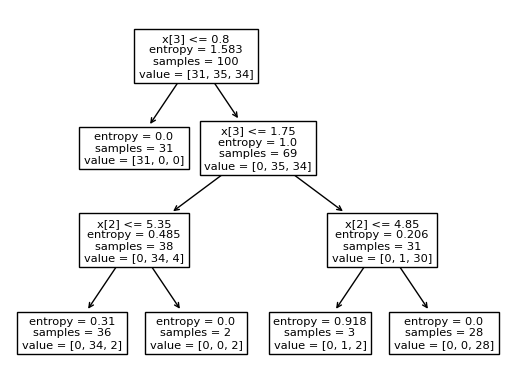

In [5]:
#Tree.predict(X_test)
print(Tree.score(X_test, y_test))
tree.plot_tree(Tree)

## Regress Tree

In [6]:
from sklearn.tree import DecisionTreeRegressor
Rtree = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth=4, random_state=42)
Rtree = Rtree.fit(X_train, y_train)
Rtree.score(X_test, y_test)

0.972572736902985

In [7]:
import requests
miku = requests.get("http://speech.ee.ntu.edu.tw/~tlkagk/courses/MLDS_2015_2/theano/miku").text.split("\n")
miku = [i.split(" ") for i in miku[:-1]]
for row in miku:
    row[0] = float(row[0])
    row[1] = float(row[1]) * -1
Miku = pd.DataFrame(miku, columns = ['X', 'Y', 'target'])

In [8]:
def plotMiku(train_x, train_y, predict_x, predict_y):
    return 0

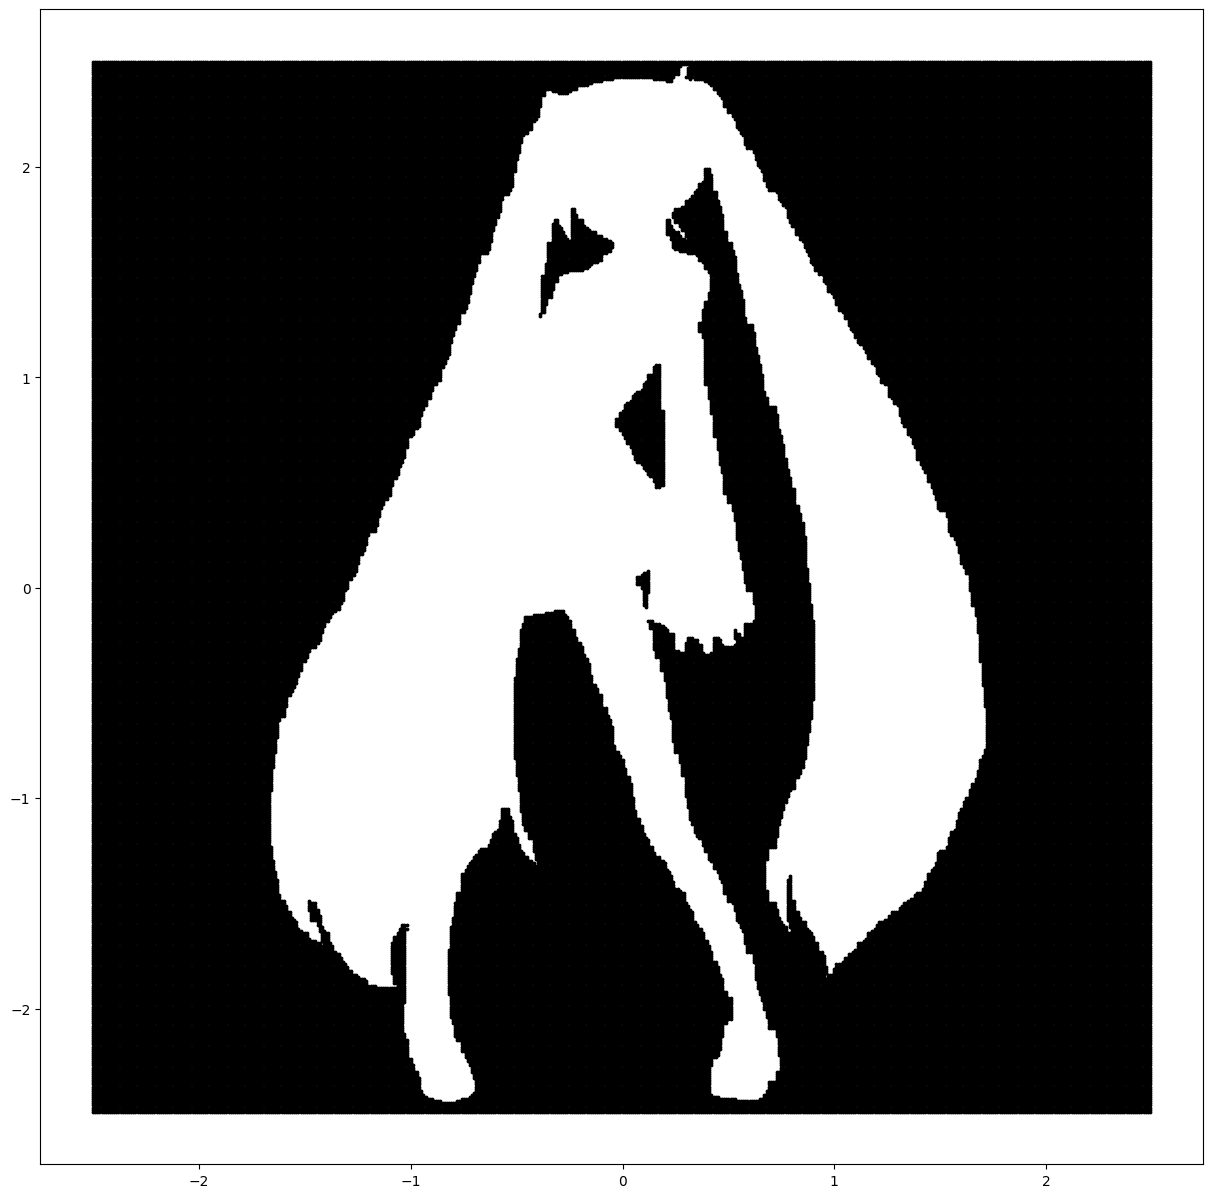

In [9]:
w = Miku[Miku['target'] == '1']
b = Miku[Miku['target'] == '0']
plt.figure(figsize=(15, 15), dpi=100)
plt.scatter(w['X'], w['Y'], color = 'white', s = 3)
plt.scatter(b['X'], b['Y'], color = 'black', s = 3)
plt.show()

In [10]:
def PlotMikuDST(Miku, deepth, ax, x, y):
    Mtree = DecisionTreeClassifier(criterion='entropy', random_state=77, max_depth=deepth)
    Mtree.fit(Miku.iloc[:, :2], Miku['target'])
    pre = Mtree.predict(Miku.iloc[:, :2])
    score = Mtree.score(Miku.iloc[:, :2], Miku['target'])
    corr = Miku[Miku['target'] == pre]
    t = Miku[pre == '1']
    f = Miku[pre == '0']
    
    ax[x][y].title.set_text('Deepth=' + str(deepth) + '\n' + 'accuracy = ' + str(score))
    ax[x][y].scatter(t['X'], t['Y'], color = 'blue', s = 1)
    ax[x][y].scatter(f['X'], f['Y'], color = 'black', s = 1)

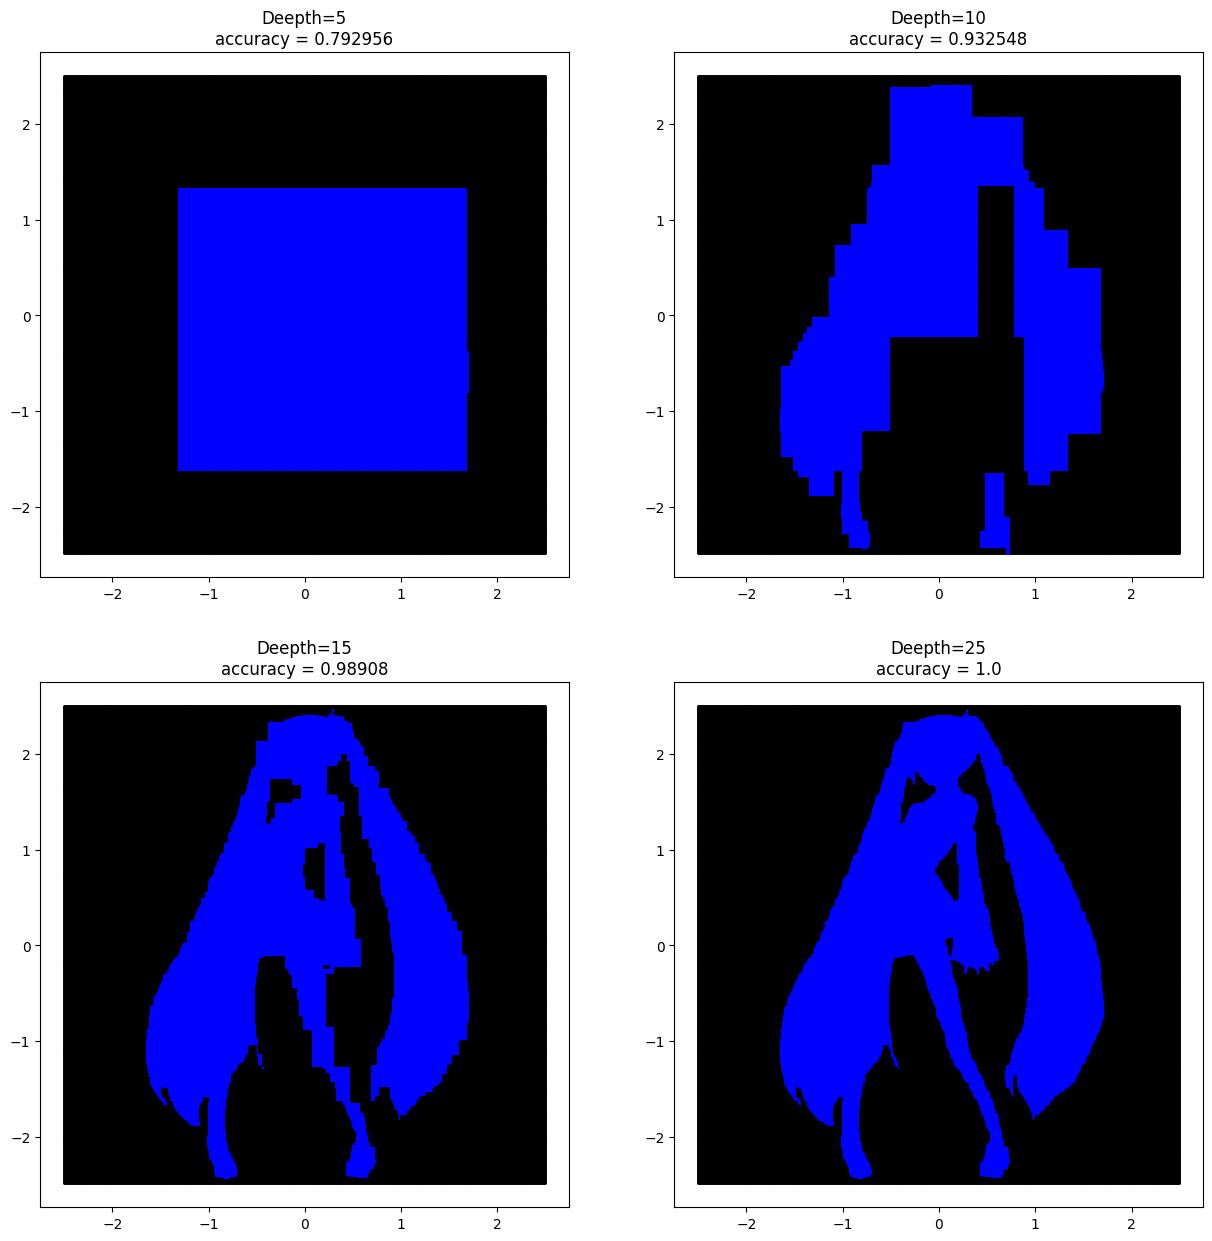

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
PlotMikuDST(Miku, 5, ax, 0, 0)
PlotMikuDST(Miku, 10, ax, 0, 1)
PlotMikuDST(Miku, 15, ax, 1, 0)
PlotMikuDST(Miku, 25, ax, 1, 1)
plt.show()

## Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import seaborn as sns

In [40]:
brc = datasets.load_breast_cancer()

data = pd.DataFrame(brc['data'], columns=brc['feature_names'])
labels = pd.DataFrame(brc['target'], columns=['label'])
Brc = pd.concat([data, labels], axis = 1)

#Normalization
Brc_Nor = Brc
for i in Brc_Nor.columns[:-1]:
    Brc_Nor[i] = (Brc_Nor[i] - Brc_Nor[i].mean()) / Brc_Nor[i].std()
corr = Brc_Nor.iloc[:, :-1].corr()

#pick high similarity columns
attrs = []
for i in corr:
    if i in attrs:continue
    keys = corr[i].keys()
    for key in keys:
        if i != key and abs(corr[i][key]) > 0.85:
            attrs.append(key)

print(attrs)
Brc = Brc.drop(attrs, axis = 1)
corr = Brc.iloc[:, :-1].corr()
print(Brc.columns)

['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 'worst texture', 'mean concavity', 'worst compactness', 'mean perimeter', 'mean concavity', 'worst perimeter', 'worst concave points', 'perimeter error', 'area error', 'mean concavity', 'worst compactness', 'worst concave points']
Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst smoothness',
       'worst concavity', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')


In [48]:
X_train, X_test, y_train, y_test = train_test_split(Brc.iloc[:, :-1], Brc['label'], test_size=0.33, random_state=42)

columns_count = len(Brc.columns)
Random_trees = RandomForestClassifier(n_estimators = int((columns_count - 1) / 2), min_samples_split = 10, random_state = 77)
Random_trees = Random_trees.fit(X_train, y_train)

print(Random_trees.score(X_test, y_test))

0.9361702127659575
